# Auto ARIMA Model on Electricity Production Data

# Import the libraries

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

# Read the Data

In [2]:
data = pd.read_csv(r'C:\Users\Sourav Kumar\Desktop\home assisgnment\Electric_Production.csv',index_col = 0)

In [3]:
data.head()

,IPG2211A2N
DATE,
1985-01-01,71.5803
1985-02-01,69.7765
1985-03-01,61.6718
1985-04-01,56.7450
1985-05-01,54.6184


# Convert Date column as index

In [4]:
data.index = pd.to_datetime(data.index)

# Change the name of the variable to Energy Production for ease of understanding

In [5]:
data.columns = ['Energy Production']

##Plot the data

<AxesSubplot:xlabel='DATE'>

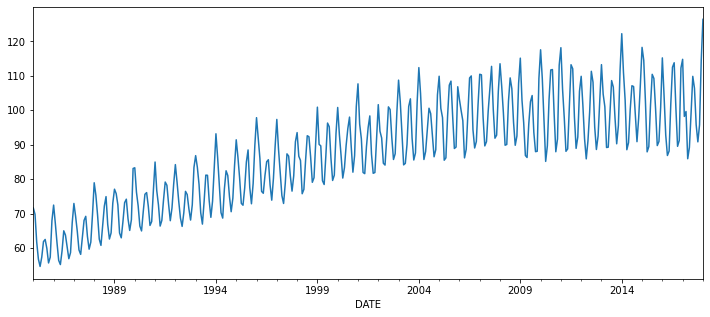

In [7]:
data['Energy Production'].plot(figsize=(12,5))

# Decompose into Components

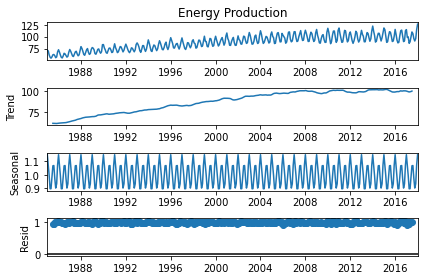

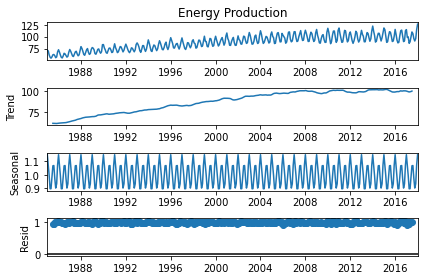

In [6]:
# ETS Decomposition
result = seasonal_decompose(data['Energy Production'],
                           model = 'multiplicative')

# ETS plot
result.plot()

# Stationary Test

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
adfuller(data['Energy Production'])

(-2.3013045929606792,
 0.17154755955101902,
 15,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1838.3598201812765)

The 'auto_arima' function from the 'pmdarima' library helps us to identify the most optimal parameters for an ARIMA model and returns a fitted ARIMA model.

In [12]:
!pip install pmdarima

In [13]:
from pmdarima import auto_arima

In [14]:
stepwise_fit = auto_arima(data['Energy Production'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2101.658, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2746.141, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2688.747, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2622.321, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2744.268, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2490.314, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2234.385, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2091.463, Time=0.52 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2447.067, Time=0.22 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2103.629, Time=0.54 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=2057.193, Time=0.71 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2429.491, Time=0.36 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=2069.368, Time=0.61 sec
 ARIMA(2,1,5)(0,0,0)[0] intercept   : 

In [15]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  397
Model:               SARIMAX(2, 1, 4)   Log Likelihood               -1020.596
Date:                Fri, 28 Jan 2022   AIC                           2057.193
Time:                        22:13:28   BIC                           2089.044
Sample:                             0   HQIC                          2069.811
                                - 397                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1069      0.024      4.427      0.000       0.060       0.154
ar.L1          0.9985      0.002    517.173      0.000       0.995       1.002
ar.L2         -0.9993      0.001   -805.129      0.000      -1.002      -0.997
ma.L1         -1.3653      0.038    -35.631      0.000      -1.440      -1.290
ma.L2          0.9292      0.071     13.025      0.000       0.789       1.069
ma.L3          0.0051      0.071      0.072      0.943      -0.135       0.145
ma.L4         -0.4327      0.041    -10.476      0.000      -0.514      -0.352
sigma2         9.9024      0.635     15.605      0.000       8.659      11.146
===================================================================================
Ljung-Box (L1) (Q):                   1.06   Jarque-Bera (JB):                23.01
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We'll train from the years 1985-2016 and test our forecast on the years after that and compare it to the real data:

In [17]:
train = data.loc['1985-01-01':'2016-12-01']
test = data.loc['2017-01-01':]

In [18]:
print(train.shape, test.shape)

(384, 1) (13, 1)


Fit ARIMA model to the train dataset

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [20]:
model = SARIMAX(train['Energy Production'],
               order = (2, 1, 4))

In [21]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Energy Production   No. Observations:                  384
Model:               SARIMAX(2, 1, 4)   Log Likelihood                -980.102
Date:                Fri, 28 Jan 2022   AIC                           1974.203
Time:                        22:15:16   BIC                           2001.840
Sample:                    01-01-1985   HQIC                          1985.166
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9979      0.002    424.201      0.000       0.993       1.003
ar.L2         -0.9984      0.002   -546.115      0.000      -1.002      -0.995
ma.L1         -1.3005      0.047    -27.513      0.000      -1.393      -1.208
ma.L2          0.9213      0.087     10.574      0.000       0.751       1.092
ma.L3          0.0194      0.090      0.216      0.829      -0.157       0.195
ma.L4         -0.3886      0.057     -6.865      0.000      -0.500      -0.278
sigma2         9.6538      0.655     14.734      0.000       8.370      10.938
===================================================================================
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):                23.09
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               1.69   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Prediction of ARIMA model against the test set

In [22]:
start = len(train)
end = len(train) + len(test) - 1

In [23]:
predictions = result.predict(start, end, typ = 'levels').rename("Predictions")

<AxesSubplot:xlabel='DATE'>

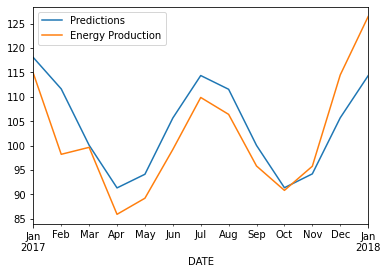

In [24]:
# plot predictions and actual values
predictions.plot(legend = True)
test['Energy Production'].plot(legend = True)

Evaluate the model using MSE and RMSE

In [25]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [26]:
rmse(test['Energy Production'], predictions)

6.654782679143584

In [27]:
mean_squared_error(test['Energy Production'], predictions)

44.28613250662946

# Forcast using ARIMA Model

In [29]:
model = model = SARIMAX(data['Energy Production'],
                        order = (2, 1, 4))
result = model.fit()

Forecast for the next 3 years

In [30]:
forecast = result.predict(start = len(data),
                        end = (len(data)-1) + 3*12,
                        typ = 'levels').rename('Forecast')

Plot the forecast values

<AxesSubplot:xlabel='DATE'>

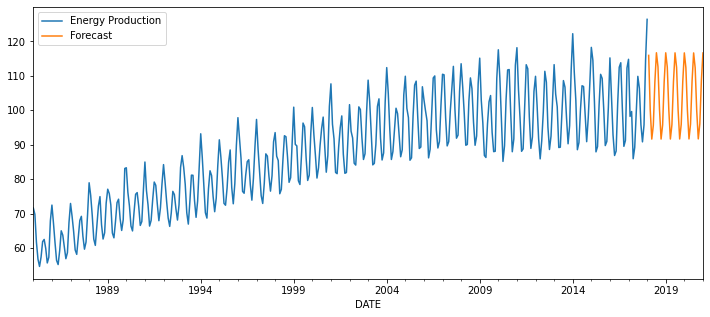

In [31]:
data['Energy Production'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)